In [1]:
import postprocessing

# Initial GPEs 

We compute the $R^2$ and $\% ISE$ values:

In [5]:
R2score_vec, ISE_vec = postprocessing.compute_R2_ISE()


Loading emulator...

Done.

Statistics on test set for GPE trained for the output LVV:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output RVV:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output LAV:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output RAV:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output LVOTdiam:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output RVOTdiam:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output LVmass:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Statistics on test set for GPE trained for the output LVWT:
  R2 = 1.00
  %ISE = 100.00 %


Loading emulator...

Done.

Stati

> The maximum scores were achieved for all the emulators, except for the emulator of the TAT that achieved \(R^2=0.99\) and TATLV\textsubscript{endo} that achieved a \(ISE=98.86\%\). 

# Global Sensitivity Analysis

> First-order effects of the GSA when modifying anatomical and functional parameters are presented in Fig 5.4.

<img src="./figures/GSA1_small.png"  width="70%" />

The image above was built in PPT, putting together individual pies. To print all the single pies, run:


Loading emulator...

Done.


/home/crg17/Desktop/KCL_projects/fitting/python/postprocessing.py:784: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if input_labels == []:



Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.

Loading emulator...

Done.


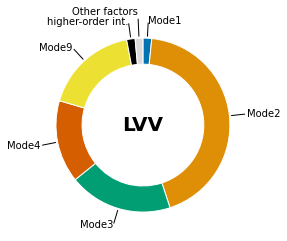

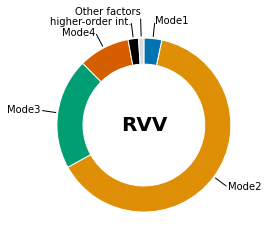

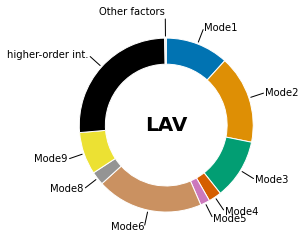

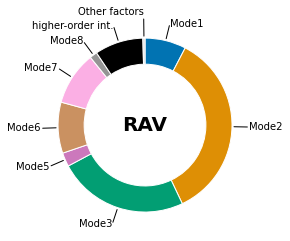

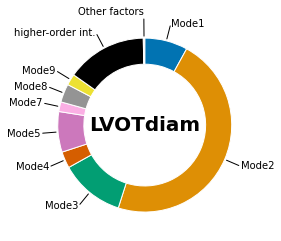

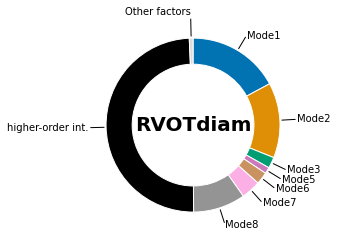

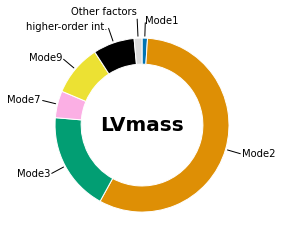

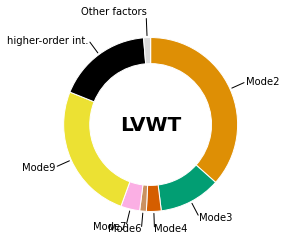

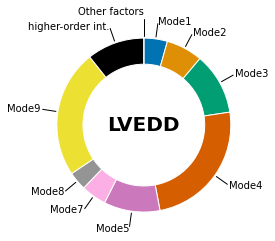

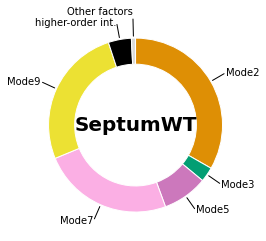

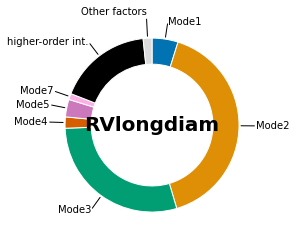

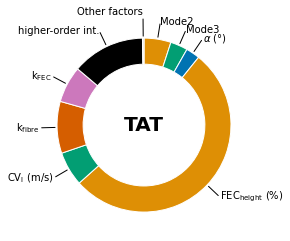

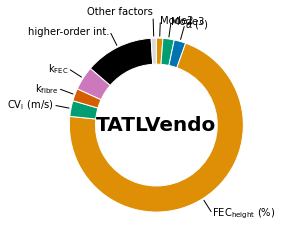

In [1]:
import postprocessing
import numpy as np

input_labels=np.genfromtxt("/media/crg17/Seagate Expansion Drive/param_labels.txt", dtype="str", delimiter="\n")
postprocessing.full_GSA(subfolder="initial_sweep", output_labels_dir="/media/crg17/Seagate Expansion Drive/biomarkers_labels.txt", input_labels=input_labels, first_order=True, second_order=False)

The results are in ```/media/crg17/Seagate Expansion Drive/initial_sweep/figures```

> In Fig \ref{fig:GSA2}, we show the second-order interactions for each output.

<img src="./figures/GSA2_small.png"  width="70%" />

The image above was built in PPT, putting together individual networks. The text in the centre of each network is also written manually. To print all the single networs, run:

In [1]:
import postprocessing
import numpy as np

input_labels=np.genfromtxt("/media/crg17/Seagate Expansion Drive/param_labels.txt", dtype="str", delimiter="\n")
postprocessing.full_GSA(subfolder="initial_sweep", output_labels_dir="/media/crg17/Seagate Expansion Drive/biomarkers_labels.txt", input_labels=input_labels, first_order=False, second_order=True)

The results are in ```/media/crg17/Seagate Expansion Drive/initial_sweep/figures```

# Calibration to literature data

> We extracted these biomarkers from the NORRE study\cite{Kou2014EchocardiographicStudy}, and ran three waves of BHM.

To run the three waves using literature data (* **heavy computationally** *):

In [ ]:
import pipeline_bhm

pipeline_bhm.literature(run_wave0=True, run_wave1=True, run_wave2=True)

>By the last wave, the original space was reduced to \(9.55\%\) of the original space size, with a maximum uncertainty quotient of \(1.9\), and a median value of \(0.67\).

To obtain the numbers above we run:

In [13]:
import numpy as np

wave0_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/initial_sweep/NROY_rel_literature.dat", dtype=float)
wave1_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/literature/wave1/NROY_rel_literature.dat", dtype=float)
wave2_NROY_rel = np.genfromtxt("/media/crg17/Seagate Expansion Drive/literature/wave2/NROY_rel_literature.dat", dtype=float)

total_reduction = round(wave0_NROY_rel*1e-4*wave1_NROY_rel*wave2_NROY_rel,2)

print(total_reduction)

9.97
